## Homework 3

* Generate dataset using `make_blobs` function in the sklearn.datasets class. Generate 2000 samples with 3 features (X) with one label (y).
* Explore and analyse raw data.
* Do preprocessing for classification.
* Split your dataset into train and test test (0.7 for train and 0.3 for test).
* Try Decision Tree and XGBoost Algorithm with different hyperparameters. (Using GridSearchCV is a plus)
* Evaluate your result on both train and test set. Analyse if there is any underfitting or overfitting problem. Make your comments.

In [16]:
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score, recall_score, accuracy_score, classification_report, f1_score

from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV  


In [23]:
X, y = make_blobs(n_samples=2000, n_features=3,random_state=42)
df = pd.DataFrame(X,columns = ["Group1","Group2","Group3"])
df.head()

,Group1,Group2,Group3
0,-8.499150,5.667142,1.509983
1,-9.736497,7.584346,1.997468
2,0.773310,-7.171882,-6.727008
3,1.745282,-5.885697,-7.788316
4,1.583768,-5.288722,-7.983133


In [4]:
#Elemination of Missing Values
df.isnull().sum()
df.dropna()
df.corr

<bound method DataFrame.corr of          Group1    Group2    Group3
0     -8.499150  5.667142  1.509983
1     -9.736497  7.584346  1.997468
2      0.773310 -7.171882 -6.727008
3      1.745282 -5.885697 -7.788316
4      1.583768 -5.288722 -7.983133
...         ...       ...       ...
1995  -7.004843  6.572623 -0.021636
1996 -10.213553  7.144539  1.863649
1997   0.055070 -7.029731 -5.528081
1998   3.402287 -7.494578 -6.555095
1999  -4.138791  9.566150  6.645453

[2000 rows x 3 columns]>

In [5]:
df.describe()

,Group1,Group2,Group3
count,2000.000000,2000.000000,2000.000000
mean,-3.185601,3.158252,-0.058714
std,4.552214,7.209014,5.037935
min,-12.420390,-10.351057,-9.712629
25%,-8.239049,-6.206542,-6.163356
50%,-2.522167,7.251697,1.965763
75%,1.275338,8.652427,4.039708
max,4.543077,11.952039,8.012175


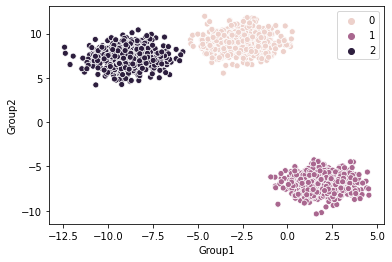

In [32]:
sns.scatterplot(x="Group1", y="Group2", hue=y, data=df)

In [7]:
label_encoder = LabelEncoder()
df["Label"] = label_encoder.fit_transform(df["Group1"]) 
df.head()

,Group1,Group2,Group3,Label
0,-8.499150,5.667142,1.509983,441
1,-9.736497,7.584346,1.997468,125
2,0.773310,-7.171882,-6.727008,1403
3,1.745282,-5.885697,-7.788316,1640
4,1.583768,-5.288722,-7.983133,1585


In [8]:
#Split Train Test Ratio
# IF test_Size = 0.3, Train automaticly equals to 0.7
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [12]:
param = [{
    "criterion" : ['gini','entropy'],
    "max_depth" : range(1,10),
    "min_samples_split" : range(1,10),
    "min_samples_leaf" : [1,2,4,5,10,20,30,40,80,100]
}]
decision = DecisionTreeClassifier()

grid = GridSearchCV(estimator=decision,param_grid=param,cv=10,verbose=1,n_jobs=-1)
grid.fit(X_train,y_train)
print("Tuned: {}".format(grid.best_params_)) 
print("Mean of the cv scores is {:.6f}".format(grid.best_score_))
print("Train Score {:.6f}".format(grid.score(X_train,y_train)))
print("Test Score {:.6f}".format(grid.score(X_test,y_test)))
print("Seconds used for refitting the best model on the train dataset: {:.6f}".format(grid.refit_time_))

Fitting 10 folds for each of 1620 candidates, totalling 16200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 11248 tasks      | elapsed:    3.3s


Tuned: {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}
Mean of the cv scores is 1.000000
Train Score 1.000000
Test Score 1.000000
Seconds used for refitting the best model on the train dataset: 0.002000


[Parallel(n_jobs=-1)]: Done 16200 out of 16200 | elapsed:    4.7s finished


In [38]:
grid_pred = grid.predict(X_test)
print(classification_report(y_test,grid_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       192
           1       1.00      1.00      1.00       198
           2       1.00      1.00      1.00       210

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600



In [39]:
# Metrics
print("Precision = {}".format(precision_score(y_test, grid_pred, average='macro')))
print("Recall = {}".format(recall_score(y_test, grid_pred, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, grid_pred)))
print("F1 Score = {}".format(f1_score(y_test, grid_pred,average='macro')))


Precision = 1.0
Recall = 1.0
Accuracy = 1.0
F1 Score = 1.0


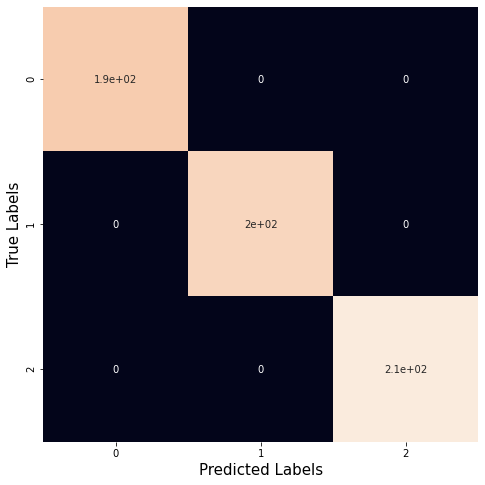

In [40]:
# Confusion Matrix
cm = confusion_matrix(y_test, grid_pred)
plt.figure(figsize=(12, 8))
ax =sns.heatmap(cm, square=True, annot=True, cbar=False)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

In [43]:
param_dict = {
    'max_depth':range(3,10,2),
    'min_child_weight':range(1,6,2),
    'learning_rate': [0.00001,0.001,0.01,0.1,1,2],
    'n_estimators': [10,190,200,210,500,1000,2000]
    
}

xgc = XGBClassifier(booster='gbtree', learning_rate =0.01, n_estimators=200, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'multi:softprob', nthread=4, scale_pos_weight=1, seed=27)
xgc.get_params().keys()

dict_keys(['objective', 'use_label_encoder', 'base_score', 'booster', 'colsample_bylevel', 'colsample_bynode', 'colsample_bytree', 'gamma', 'gpu_id', 'importance_type', 'interaction_constraints', 'learning_rate', 'max_delta_step', 'max_depth', 'min_child_weight', 'missing', 'monotone_constraints', 'n_estimators', 'n_jobs', 'num_parallel_tree', 'random_state', 'reg_alpha', 'reg_lambda', 'scale_pos_weight', 'subsample', 'tree_method', 'validate_parameters', 'verbosity', 'nthread', 'seed'])

In [44]:
clf = GridSearchCV(xgc,param_dict,cv=3, n_jobs = -1).fit(X_train,y_train)

print("Tuned: {}".format(clf.best_params_)) 
print("Mean of the cv scores is {:.6f}".format(clf.best_score_))
print("Train Score {:.6f}".format(clf.score(X_train,y_train)))
print("Test Score {:.6f}".format(clf.score(X_test,y_test)))
print("Seconds used for refitting the best model on the train dataset: {:.6f}".format(clf.refit_time_))

[16:05:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:05:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Tuned: {'learning_rate': 1e-05, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 10}
Mean of the cv scores is 1.000000
Train Score 0.995714
Test Score 0.995000
Seconds used for refitting the best model on the train dataset: 0.019004


C:\Users\batuy\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [45]:
xgboost_pred = grid.predict(X_test)
print(classification_report(y_test,xgboost_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       192
           1       1.00      1.00      1.00       198
           2       1.00      1.00      1.00       210

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600



In [46]:
# Metrics
print("Precision = {}".format(precision_score(y_test, xgboost_pred, average='macro')))
print("Recall = {}".format(recall_score(y_test, xgboost_pred, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, xgboost_pred)))
print("F1 Score = {}".format(f1_score(y_test, xgboost_pred,average='macro')))


Precision = 1.0
Recall = 1.0
Accuracy = 1.0
F1 Score = 1.0


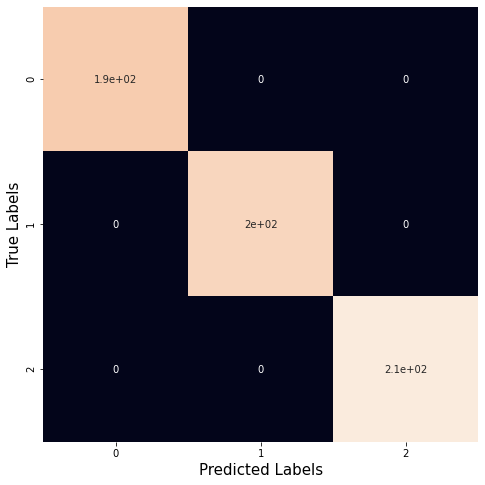

In [47]:
# Confusion Matrix
cm = confusion_matrix(y_test, xgboost_pred)
plt.figure(figsize=(12, 8))
ax =sns.heatmap(cm, square=True, annot=True, cbar=False)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

In [48]:
print("\nDecisionTree Results with GridSearchCV")
print("--------------------------------------------------")
print("Tuned: {}".format(grid.best_params_)) 
print("Mean of the cv scores is {:.6f}".format(grid.best_score_))
print("Train Score {:.6f}".format(grid.score(X_train,y_train)))
print("Test Score {:.6f}".format(grid.score(X_test,y_test)))
print("Seconds used for refitting the best model on the train dataset: {:.6f}\n\n".format(grid.refit_time_))
print("XGBoost Results with GridSearchCV")
print("--------------------------------------------------")
print("Tuned: {}".format(clf.best_params_)) 
print("Mean of the cv scores is {:.6f}".format(clf.best_score_))
print("Train Score {:.6f}".format(clf.score(X_train,y_train)))
print("Test Score {:.6f}".format(clf.score(X_test,y_test)))
print("Seconds used for refitting the best model on the train dataset: {:.6f}".format(clf.refit_time_))


DecisionTree Results with GridSearchCV
--------------------------------------------------
Tuned: {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}
Mean of the cv scores is 1.000000
Train Score 1.000000
Test Score 1.000000
Seconds used for refitting the best model on the train dataset: 0.002000


XGBoost Results with GridSearchCV
--------------------------------------------------
Tuned: {'learning_rate': 1e-05, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 10}
Mean of the cv scores is 1.000000
Train Score 0.995714
Test Score 0.995000
Seconds used for refitting the best model on the train dataset: 0.019004
